In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model/data parameters
num_classes = 10
input_shape = (28, 28, 1)

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# Make model
# Define CNN model
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dense(100, activation="relu"),
     layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [5]:
# Define training parameters
batch_size = 200
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
270/270 [==============================] - 14s 9ms/step - loss: 0.2765 - accuracy: 0.9185 - val_loss: 0.0711 - val_accuracy: 0.9782
Epoch 2/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0459 - val_accuracy: 0.9860
Epoch 3/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0499 - val_accuracy: 0.9853
Epoch 4/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0399 - val_accuracy: 0.9888
Epoch 5/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 6/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 7/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0389 - val_accuracy: 0.9895
Epoch

In [6]:
# Check performance
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.028732245787978172
Test accuracy: 0.9926000237464905


Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 2


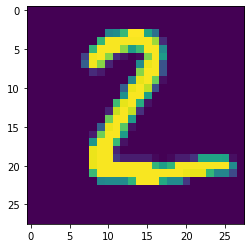

Predicted Image Label Array: ['0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 2


In [10]:
import matplotlib.pyplot as plt

# Test model
img_id = 1

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print("Image shape:", sample_test_image.shape)
print("True Image Label Array:", sample_test_label,
      "\nTrue Image Label Shape:", sample_test_label.shape,
      "\nTrue Image Label:", np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28, 28), interpolation='nearest')
plt.show()

prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))

print("Predicted Image Label Array:", ['{0:0.3f}'.format(i) for i in prediction[0]],
      "\nPredicted Image Label Shape:", prediction.shape,
      "\nPredicted Image Label:", np.argmax(prediction))